In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Exploratory analysis

### 1.1 Data load, preliminary analysis and preprocessing

In [3]:
imdb_data = pd.read_csv("imdb_top_1000.csv")

Before preprocessing the data, we study the general composition of the dataset.

In [4]:
imdb_data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [5]:
imdb_data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

Total number of NaN values in each column. Certificates, Meta Score and Gross have some empty fields

In [6]:
imdb_data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Data types per column. From this, Gross needs to be converted to a number, Released Year to datetime for easier handling, Runtime to integer and the Genre column will be transformed into a list

In [7]:
imdb_data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [8]:
imdb_data["Gross"] = imdb_data["Gross"].apply(lambda x: float(x.replace(",", "")) if isinstance(x, str) else x)
imdb_data["Released_Year"] = pd.to_datetime(imdb_data["Released_Year"], format="%Y", errors="coerce")
imdb_data["Runtime"] = imdb_data["Runtime"].apply(lambda x: int(x.split()[0]))
imdb_data["Genre"] = imdb_data["Genre"].apply(lambda x: x.split(", "))

In [9]:
imdb_data.dtypes


Poster_Link              object
Series_Title             object
Released_Year    datetime64[ns]
Certificate              object
Runtime                   int64
Genre                    object
IMDB_Rating             float64
Overview                 object
Meta_score              float64
Director                 object
Star1                    object
Star2                    object
Star3                    object
Star4                    object
No_of_Votes               int64
Gross                   float64
dtype: object

General statistics of the dataset. We see that the lowest IMDB rating present in the dataset is 7.6, as the dataset only includes the top 1000 movies by rating in IMDB.

In [10]:
imdb_data.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1991-03-21 11:00:10.810810880,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
min,1920-01-01 00:00:00,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976-01-01 00:00:00,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999-01-01 00:00:00,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009-01-01 00:00:00,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,2020-01-01 00:00:00,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08
std,NaN,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08


array([[<Axes: title={'center': 'Released_Year'}>,
        <Axes: title={'center': 'Runtime'}>],
       [<Axes: title={'center': 'IMDB_Rating'}>,
        <Axes: title={'center': 'Meta_score'}>],
       [<Axes: title={'center': 'No_of_Votes'}>,
        <Axes: title={'center': 'Gross'}>]], dtype=object)

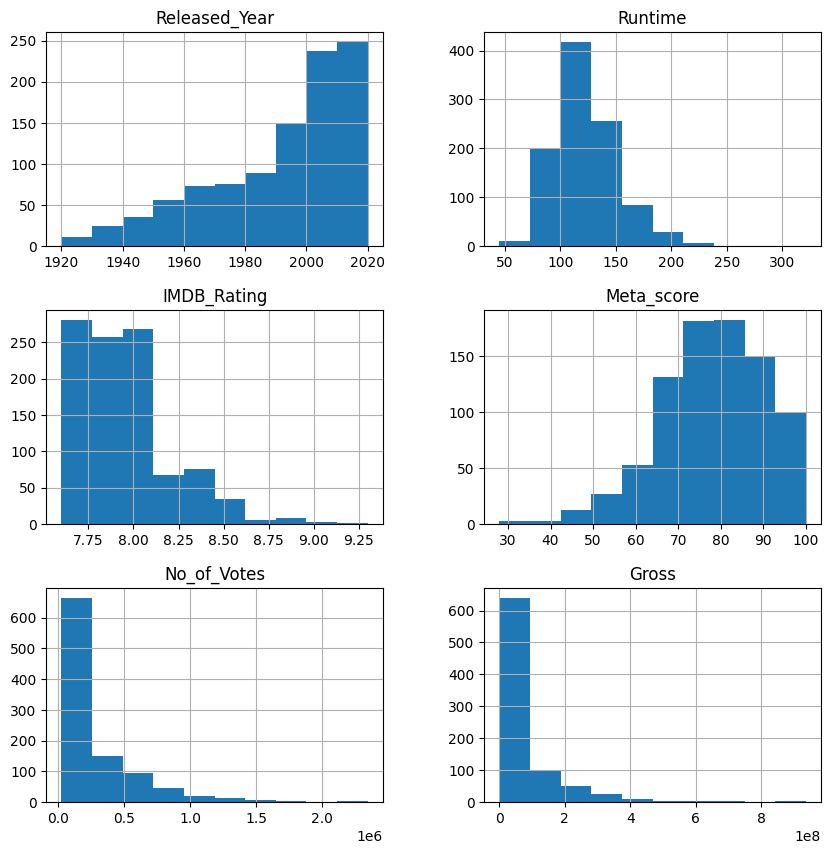

In [11]:
imdb_data.hist(figsize=(10, 10))

### 1.2. Analysis per column

### Release year

Most of the movies have been released in the this century.

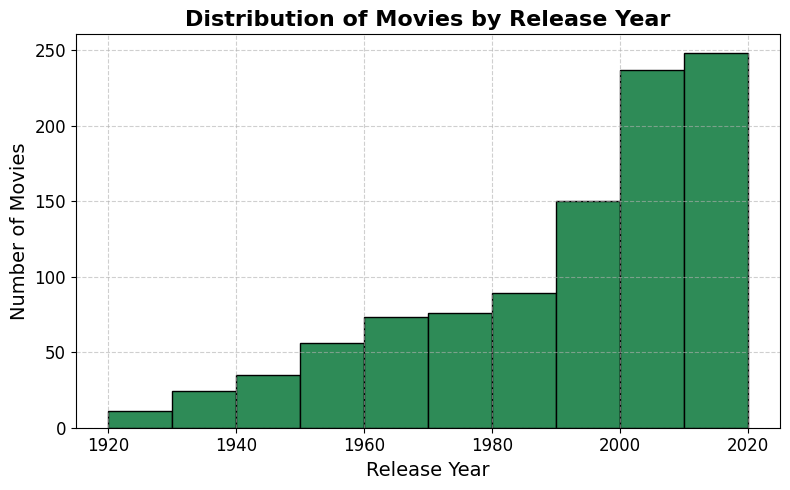

In [12]:
imdb_data["Released_Year"].hist(bins=10, figsize=(8, 5), color="seagreen", edgecolor="black")
plt.title("Distribution of Movies by Release Year", fontsize=16, fontweight="bold")
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Certificate

There are 16 different types of certificates present in the dataset, but some of them correspond to an equivalent rating from another country. Some of the ratings listed in the dataset include:


* **Rated G:** For all audiences.
* **Rated PG or GP:** Parental guidance suggested (mainly for under 10's).
* **U:** Universal, for all audiences.
* **UA:** Unrestricted public exhibition, but with a word of caution that parental discretion is required.
* **A:** Depending on the country, it can be all audiences or only for adults.
* **TV-PG:** Parental guidelines suggested, for TV.
* **TV-14:** Appropriate for teens 14 and up, for TV.
* **TV-MA:** Designed for adults, for TV.

Extracted from: [IMDB's own help center](https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpms_helpart_inline#), [Classification and Rating Administration](https://www.filmratings.com/History), [Motion Picture Association](https://www.motionpictures.org/film-ratings/)

In [13]:
imdb_data["Certificate"].value_counts()

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

To unify some of the certificates, we can use the following transformation function:

In [14]:
def unify_certificate(cert):
    if pd.isna(cert):
        return cert
    if cert in ["PG", "GP", "TV-PG"]:
        return "PG"
    elif cert in ["G", "U"]:
        return "G"
    elif cert in ["UA", "U/A"]:
        return "UA"
    elif cert in ["A", "TV-MA"]:
        return "A"
    else:
        return cert

In [15]:
imdb_data["Certificate"] = imdb_data["Certificate"].apply(unify_certificate)

In [16]:
imdb_data["Certificate"].value_counts()

Certificate
G           246
A           198
UA          176
R           146
PG-13        43
PG           42
Passed       34
Approved     11
TV-14         1
16            1
Unrated       1
Name: count, dtype: int64

### Runtime

Most movies are around 2 hours long, but there are some extremes in 45 m and 230 m.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200'),
  Text(0, 225.0, '225')])

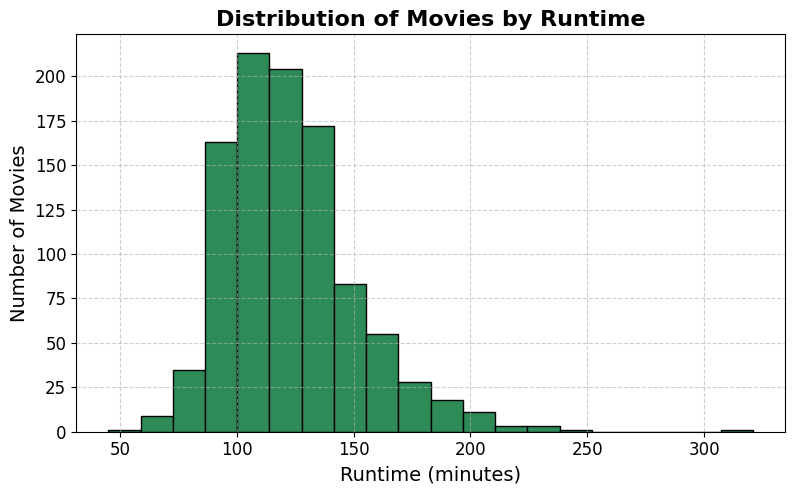

In [17]:
imdb_data.Runtime.hist(figsize=(8, 5), bins=20, color="seagreen", edgecolor="black")
plt.title("Distribution of Movies by Runtime", fontsize=16, fontweight="bold")
plt.xlabel("Runtime (minutes)", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [38]:
imdb_data.sort_values(by="Runtime", ascending=False).head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Joined_Stars
140,https://m.media-amazon.com/images/M/MV5BMTc5Nj...,Gangs of Wasseypur,2012-01-01,A,321,"[Action, Comedy, Crime]",8.2,A clash between Sultan and Shahid Khan leads t...,89.0,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui,Tigmanshu Dhulia,82365,NaN,"[Manoj Bajpayee, Richa Chadha, Nawazuddin Sidd..."
812,https://m.media-amazon.com/images/M/MV5BM2U5OW...,Hamlet,1996-01-01,PG-13,242,[Drama],7.7,"Hamlet, Prince of Denmark, returns home to fin...",NaN,Kenneth Branagh,Kenneth Branagh,Julie Christie,Derek Jacobi,Kate Winslet,35991,4414535.0,"[Kenneth Branagh, Julie Christie, Derek Jacobi..."
314,https://m.media-amazon.com/images/M/MV5BYjUyZW...,Gone with the Wind,1939-01-01,G,238,"[Drama, History, Romance]",8.1,A manipulative woman and a roguish man conduct...,97.0,Victor Fleming,George Cukor,Sam Wood,Clark Gable,Vivien Leigh,290074,198676459.0,"[George Cukor, Sam Wood, Clark Gable, Vivien L..."


In [39]:
imdb_data.sort_values(by="Runtime", ascending=False).tail(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Joined_Stars
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926-01-01,Passed,67,"[Action, Adventure, Comedy]",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1033895.0,"[Buster Keaton, Buster Keaton, Marion Mack, Gl..."
567,https://m.media-amazon.com/images/M/MV5BMjMyYj...,Freaks,1932-01-01,NaN,64,"[Drama, Horror]",7.9,A circus' beautiful trapeze artist agrees to m...,80.0,Tod Browning,Wallace Ford,Leila Hyams,Olga Baclanova,Roscoe Ates,42117,NaN,"[Wallace Ford, Leila Hyams, Olga Baclanova, Ro..."
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924-01-01,Passed,45,"[Action, Comedy, Romance]",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,977375.0,"[Buster Keaton, Kathryn McGuire, Joe Keaton, E..."


### Genre

Most movies have two or more genres listed, and the most frequent genre is Drama. There is a more in-depth analysis in the notebook of specification 2.

In [18]:
imdb_data.Genre.value_counts()

Genre
[Drama]                        85
[Drama, Romance]               37
[Comedy, Drama]                35
[Comedy, Drama, Romance]       31
[Action, Crime, Drama]         30
                               ..
[Adventure, Thriller]           1
[Animation, Action, Sci-Fi]     1
[Action, Crime, Comedy]         1
[Animation, Crime, Mystery]     1
[Adventure, Comedy, War]        1
Name: count, Length: 202, dtype: int64

In [19]:
imdb_data.Genre.apply(len).value_counts()

Genre
3    646
2    249
1    105
Name: count, dtype: int64

In [20]:
flattened_genres = pd.Series(np.concatenate(imdb_data.Genre))
flattened_genres.value_counts(normalize=True)

Drama        0.284927
Comedy       0.091696
Crime        0.082251
Adventure    0.077135
Action       0.074380
Thriller     0.053916
Romance      0.049193
Biography    0.042896
Mystery      0.038961
Animation    0.032271
Sci-Fi       0.026368
Fantasy      0.025974
History      0.022039
Family       0.022039
War          0.020071
Music        0.013774
Horror       0.012593
Western      0.007871
Film-Noir    0.007477
Sport        0.007477
Musical      0.006690
Name: proportion, dtype: float64

### IMDB Rating

As mentioned above, this dataset only contains the top 1000 highest rated movies, so all ratings are distributed between 9.3 and 7.6. However, most ratings are in the [7.6, 8.1] range.

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

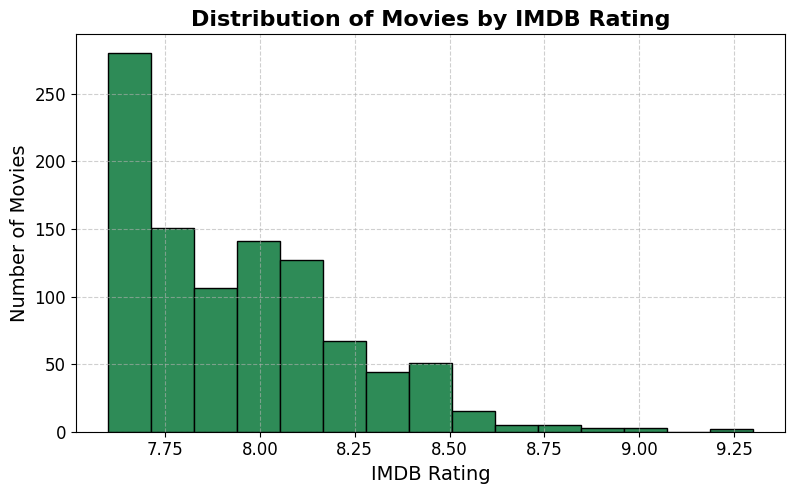

In [21]:
imdb_data.IMDB_Rating.hist(figsize=(8, 5), bins=15, color="seagreen", edgecolor="black")
plt.title("Distribution of Movies by IMDB Rating", fontsize=16, fontweight="bold")
plt.xlabel("IMDB Rating", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([7.5 , 7.75, 8.  , 8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 ]),
 [Text(0, 7.5, '7.50'),
  Text(0, 7.75, '7.75'),
  Text(0, 8.0, '8.00'),
  Text(0, 8.25, '8.25'),
  Text(0, 8.5, '8.50'),
  Text(0, 8.75, '8.75'),
  Text(0, 9.0, '9.00'),
  Text(0, 9.25, '9.25'),
  Text(0, 9.5, '9.50')])

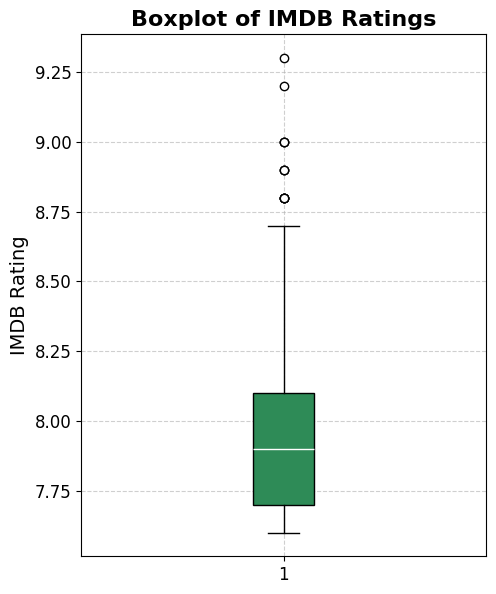

In [22]:
plt.figure(figsize=(5, 6))
plt.boxplot(imdb_data.IMDB_Rating, vert=True, patch_artist=True, boxprops=dict(facecolor="seagreen", color="black"),
            medianprops=dict(color="white"), whiskerprops=dict(color="black"), capprops=dict(color="black"),
            flierprops=dict(markerfacecolor="white", markeredgecolor="black"))
plt.title("Boxplot of IMDB Ratings", fontsize=16, fontweight="bold")
plt.ylabel("IMDB Rating", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Meta score

There is a higher variability in meta scores. Although most scores are distributed around 80, a considerably high rating, there are many movies with a score of 70 or below, contradicting the IMDB rating.

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

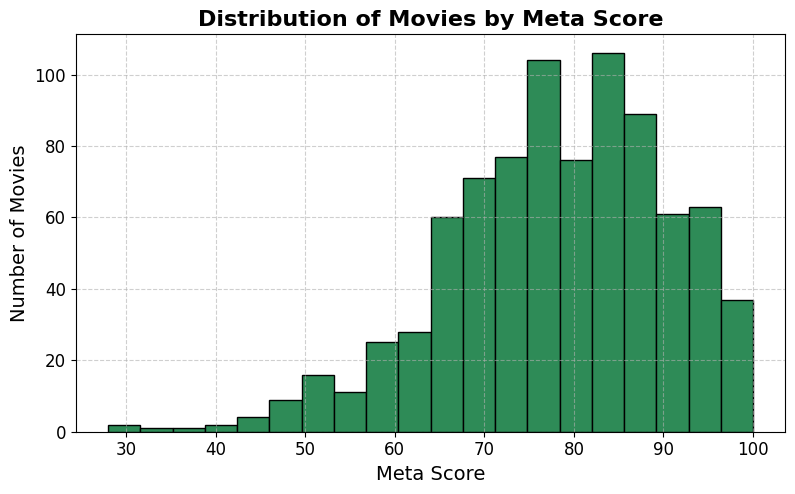

In [23]:
imdb_data.Meta_score.hist(figsize=(8, 5), bins=20, color="seagreen", edgecolor="black")
plt.title("Distribution of Movies by Meta Score", fontsize=16, fontweight="bold")
plt.xlabel("Meta Score", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [24]:
imdb_data.Meta_score.describe()

count    843.000000
mean      77.971530
std       12.376099
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Meta_score, dtype: float64

### Director

The most prolific director is Hitchcock, closely followed by Spielberg. There are in total 548 directors.

In [25]:
imdb_data.Director.value_counts()

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: count, Length: 548, dtype: int64

### Stars

We merge all the star columns into a single one and then flatten the array to obtain the total appearances of all actors. From this, we see the actor with most presence in top-rated movies is Robert De Niro, followed by Tom Hanks and Al Pacino.

In [26]:
imdb_data["Joined_Stars"] = imdb_data.apply(lambda x: [x["Star1"], x["Star2"], x["Star3"], x["Star4"]], axis=1)

In [27]:
flattened_stars = pd.Series(np.concatenate(imdb_data.Joined_Stars))
flattened_stars.value_counts()

Robert De Niro     17
Tom Hanks          14
Al Pacino          13
Clint Eastwood     12
Brad Pitt          12
                   ..
Marjane Satrapi     1
Caio Junqueira      1
Mila Kunis          1
Freida Pinto        1
Godfrey Tearle      1
Name: count, Length: 2709, dtype: int64

### No of votes

More than 75% of movies have 500.000 votes or less, with a small minority having over 1 million votes.

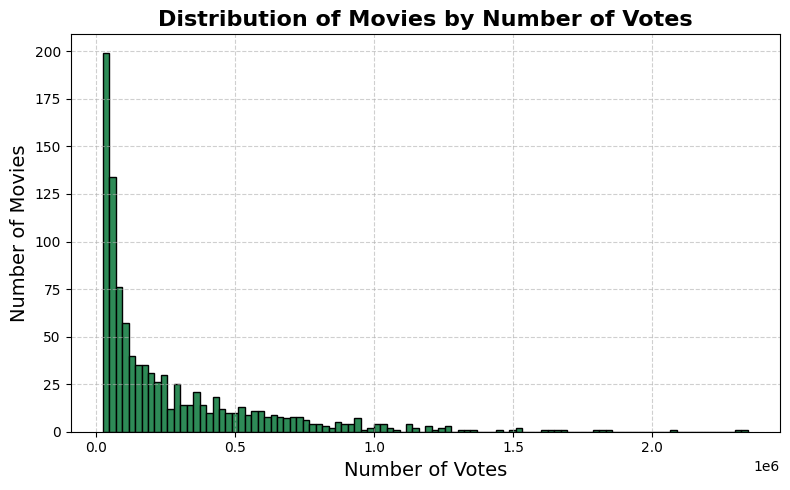

In [28]:
imdb_data.No_of_Votes.hist(bins=100, figsize=(8, 5), color="seagreen", edgecolor="black")
plt.title("Distribution of Movies by Number of Votes", fontsize=16, fontweight="bold")
plt.xlabel("Number of Votes", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

In [29]:
imdb_data.No_of_Votes.describe()

count    1.000000e+03
mean     2.736929e+05
std      3.273727e+05
min      2.508800e+04
25%      5.552625e+04
50%      1.385485e+05
75%      3.741612e+05
max      2.343110e+06
Name: No_of_Votes, dtype: float64

### Gross

The distribution of groos for movies is also highly skewed, with values raging from around 1.300 to 930.000.000. Gross does not have inflation into account, so a direct comparison between movies that are decades apart will no be accurate. More of this will be discussed in the following section.

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350'),
  Text(0, 400.0, '400'),
  Text(0, 450.0, '450')])

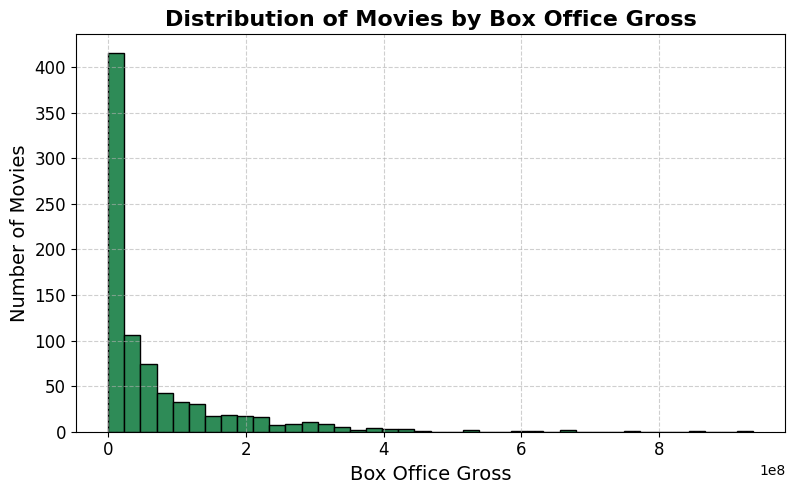

In [30]:
imdb_data.Gross.hist(bins=40, figsize=(8, 5), color="seagreen", edgecolor="black")
plt.title("Distribution of Movies by Box Office Gross", fontsize=16, fontweight="bold")
plt.xlabel("Box Office Gross", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([-2.50e+07,  0.00e+00,  2.50e+07,  5.00e+07,  7.50e+07,  1.00e+08,
         1.25e+08,  1.50e+08,  1.75e+08,  2.00e+08]),
 [Text(0, -25000000.0, '−0.25'),
  Text(0, 0.0, '0.00'),
  Text(0, 25000000.0, '0.25'),
  Text(0, 50000000.0, '0.50'),
  Text(0, 75000000.0, '0.75'),
  Text(0, 100000000.0, '1.00'),
  Text(0, 125000000.0, '1.25'),
  Text(0, 150000000.0, '1.50'),
  Text(0, 175000000.0, '1.75'),
  Text(0, 200000000.0, '2.00')])

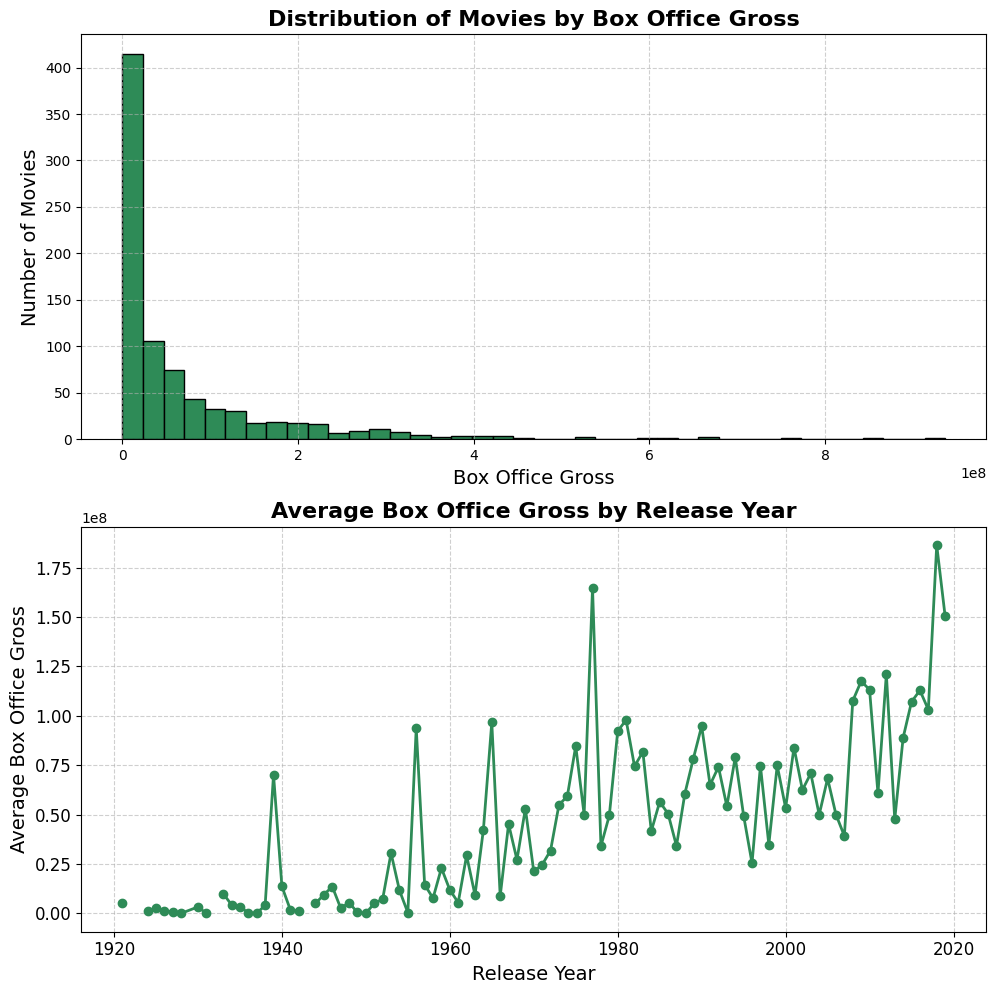

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
imdb_data.Gross.hist(bins=40, ax=ax[0], color="seagreen", edgecolor="black")
ax[0].set_title("Distribution of Movies by Box Office Gross", fontsize=16, fontweight="bold")
ax[0].set_xlabel("Box Office Gross", fontsize=14)
ax[0].set_ylabel("Number of Movies", fontsize=14)
ax[0].grid(True, linestyle="--", alpha=0.6)
imdb_data.groupby(imdb_data["Released_Year"].dt.year)["Gross"].mean().plot(ax=ax[1], color="seagreen", marker="o", linewidth=2)
ax[1].set_title("Average Box Office Gross by Release Year", fontsize=16, fontweight="bold")
ax[1].set_xlabel("Release Year", fontsize=14)
ax[1].set_ylabel("Average Box Office Gross", fontsize=14)
ax[1].grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


(array([-2.e+08,  0.e+00,  2.e+08,  4.e+08,  6.e+08,  8.e+08,  1.e+09]),
 [Text(0, -200000000.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 200000000.0, '2'),
  Text(0, 400000000.0, '4'),
  Text(0, 600000000.0, '6'),
  Text(0, 800000000.0, '8'),
  Text(0, 1000000000.0, '10')])

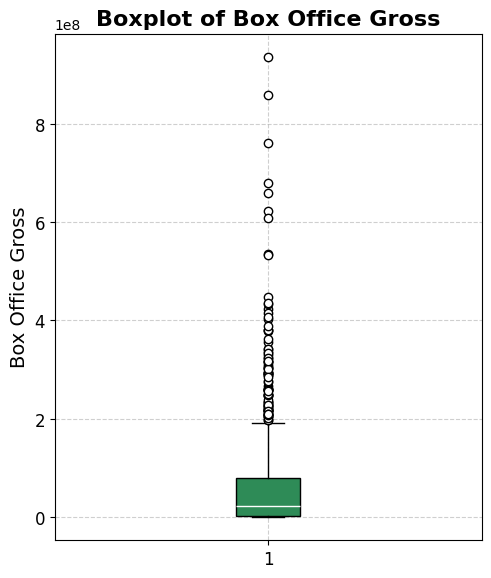

In [47]:
plt.figure(figsize=(5, 6))
plt.boxplot(imdb_data.Gross.dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="seagreen", color="black"),
            medianprops=dict(color="white"), whiskerprops=dict(color="black"), capprops=dict(color="black"),
            flierprops=dict(markerfacecolor="white", markeredgecolor="black"))
plt.title("Boxplot of Box Office Gross", fontsize=16, fontweight="bold")
plt.ylabel("Box Office Gross", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [30]:
imdb_data.Gross.describe()

count    8.310000e+02
mean     6.803475e+07
std      1.097500e+08
min      1.305000e+03
25%      3.253559e+06
50%      2.353089e+07
75%      8.075089e+07
max      9.366622e+08
Name: Gross, dtype: float64

## 1.3. Trends

### Average rating by year

We see the average rating per year has more frequent peaks and dips in the earlier movies. This is influenced by the fact we observed earlier of most movies in the list being released in the last 30 years, so average for earlier movies frequently contain only 1-10 movies and are more sensitive to new entries.

In [33]:
average_rating_year = imdb_data.groupby("Released_Year")["IMDB_Rating"].mean()

(array([7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6]),
 [Text(0, 7.7, '7.7'),
  Text(0, 7.8, '7.8'),
  Text(0, 7.9, '7.9'),
  Text(0, 8.0, '8.0'),
  Text(0, 8.1, '8.1'),
  Text(0, 8.2, '8.2'),
  Text(0, 8.3, '8.3'),
  Text(0, 8.4, '8.4'),
  Text(0, 8.5, '8.5'),
  Text(0, 8.6, '8.6')])

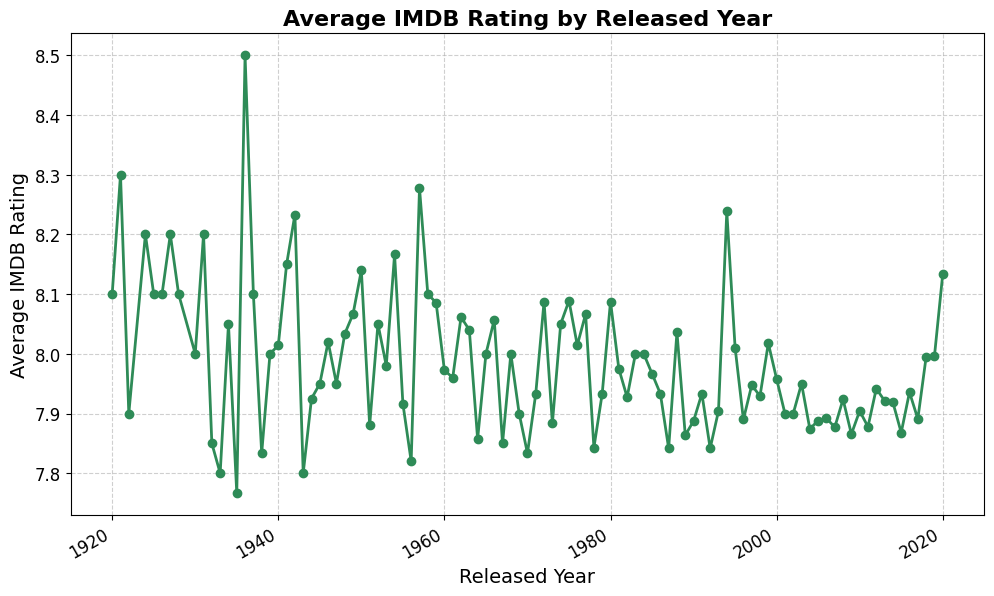

In [ ]:
average_rating_year.plot(figsize=(10, 6), color='seagreen', marker='o', linewidth=2)
plt.title("Average IMDB Rating by Release Year", fontsize=16, fontweight='bold')
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Average IMDB Rating", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35')])

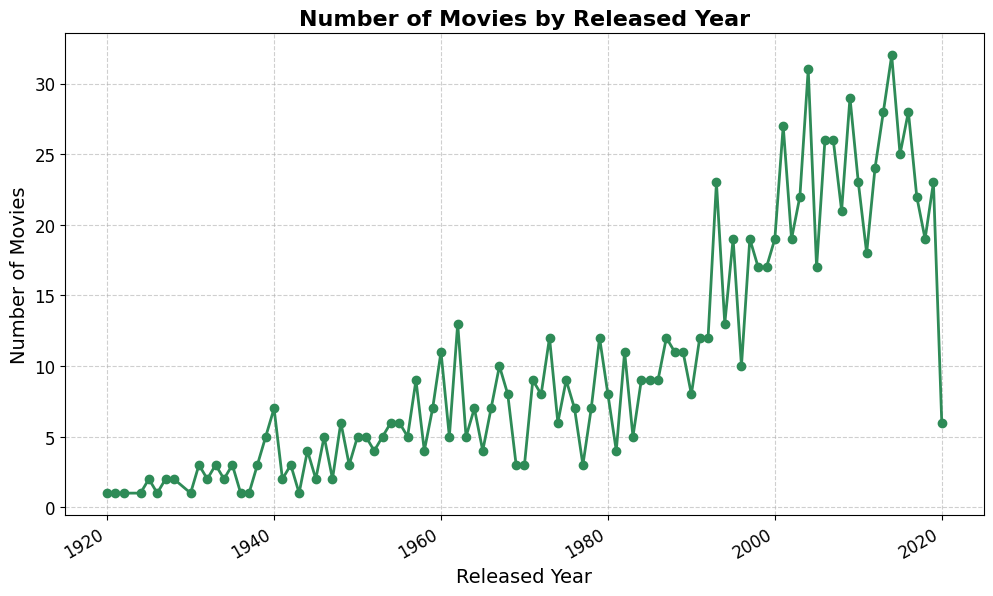

In [ ]:
imdb_data.groupby("Released_Year")["Series_Title"].count().plot(figsize=(10, 6), color='seagreen', marker='o', linewidth=2)
plt.title("Number of Movies by Release Year", fontsize=16, fontweight='bold')
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Average box office gross by year

As noted above, the figures for box office gross are not adjusted for inflation, so naturally there will be a general trend upwards and a drastic difference in gross between earlier movies and more recent movies. However, there are some interesting peaks throughout the years, for example in 1977 with the release of Star Wars.

In [36]:
average_gross_year = imdb_data.groupby("Released_Year")["Gross"].mean().to_frame()

(array([-2.50e+07,  0.00e+00,  2.50e+07,  5.00e+07,  7.50e+07,  1.00e+08,
         1.25e+08,  1.50e+08,  1.75e+08,  2.00e+08]),
 [Text(0, -25000000.0, '−0.25'),
  Text(0, 0.0, '0.00'),
  Text(0, 25000000.0, '0.25'),
  Text(0, 50000000.0, '0.50'),
  Text(0, 75000000.0, '0.75'),
  Text(0, 100000000.0, '1.00'),
  Text(0, 125000000.0, '1.25'),
  Text(0, 150000000.0, '1.50'),
  Text(0, 175000000.0, '1.75'),
  Text(0, 200000000.0, '2.00')])

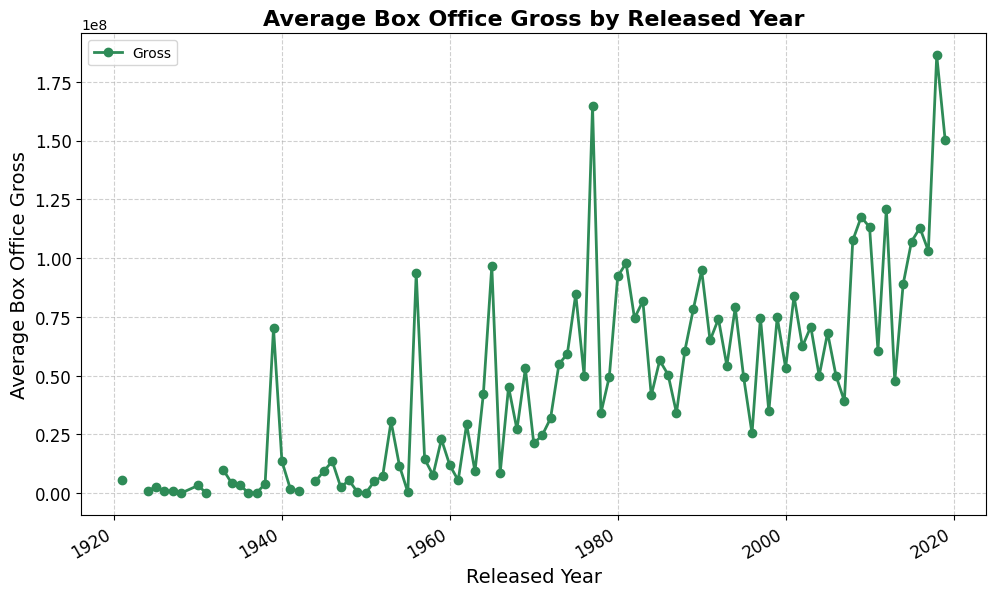

In [ ]:
average_gross_year.plot(figsize=(10, 6), color='seagreen', marker='o', linewidth=2)
plt.title("Average Box Office Gross by Release Year", fontsize=16, fontweight='bold')
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Average Box Office Gross", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [36]:
average_gross_year.sort_values(by="Gross", ascending=False).head(10)

,Gross
Released_Year,
2018-01-01,1.862684e+08
1977-01-01,1.646763e+08
2019-01-01,1.504214e+08
2012-01-01,1.210770e+08
2009-01-01,1.174868e+08
2010-01-01,1.131919e+08
2016-01-01,1.128503e+08
2008-01-01,1.075356e+08
2015-01-01,1.070581e+08


In [37]:
imdb_data[imdb_data.Released_Year.dt.year == 1977].sort_values(by="Gross", ascending=False)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Joined_Stars
29,https://m.media-amazon.com/images/M/MV5BNzVlY2...,Star Wars,1977-01-01,UA,121,"[Action, Adventure, Fantasy]",8.6,Luke Skywalker joins forces with a Jedi Knight...,90.0,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness,1231473,322740140.0,"[Mark Hamill, Harrison Ford, Carrie Fisher, Al..."
988,https://m.media-amazon.com/images/M/MV5BMjM1Nj...,Close Encounters of the Third Kind,1977-01-01,G,138,"[Drama, Sci-Fi]",7.6,"Roy Neary, an electric lineman, watches how hi...",90.0,Steven Spielberg,Richard Dreyfuss,François Truffaut,Teri Garr,Melinda Dillon,184966,132088635.0,"[Richard Dreyfuss, François Truffaut, Teri Gar..."
414,https://m.media-amazon.com/images/M/MV5BZDg1OG...,Annie Hall,1977-01-01,A,93,"[Comedy, Romance]",8.0,Neurotic New York comedian Alvy Singer falls i...,92.0,Woody Allen,Woody Allen,Diane Keaton,Tony Roberts,Carol Kane,251823,39200000.0,"[Woody Allen, Diane Keaton, Tony Roberts, Caro..."


### Average runtime by year

We see earlier movies had more variations in length, then start to stabilize at around 120 mins. Due to the small sample of movies earlier to 1960s, it is hard to ascertain from the data alone if movies were shorter in this time period of if the top movies had an unusual format.

In [38]:
average_length_year = imdb_data.groupby("Released_Year")["Runtime"].mean()

(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

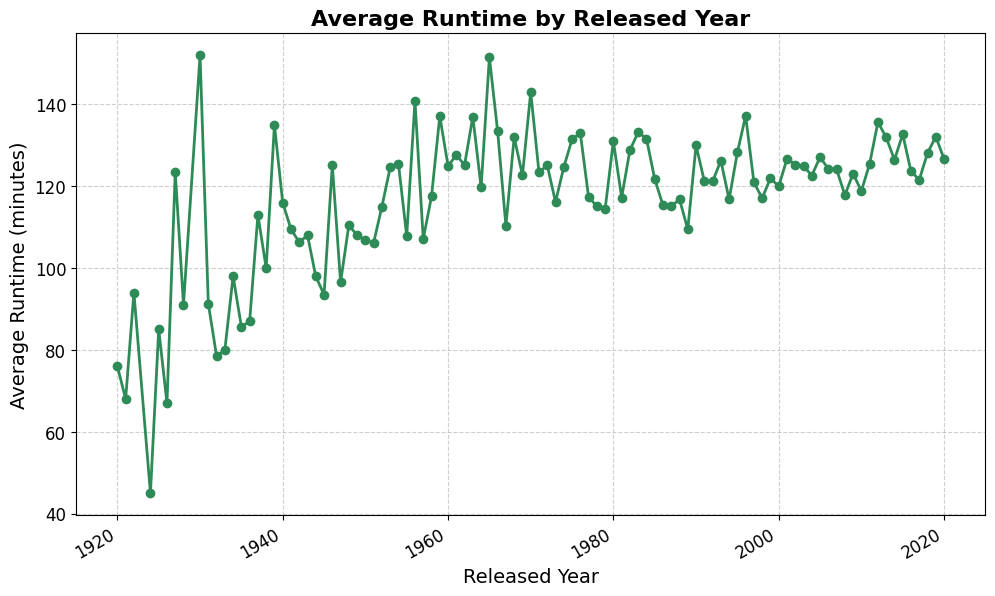

In [ ]:
average_length_year.plot(figsize=(10, 6), color="seagreen", marker="o", linewidth=2)
plt.title("Average Runtime by Release Year", fontsize=16, fontweight="bold")
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Average Runtime (minutes)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Runtime vs rating

We see a general trend upwards between movie length and rating, indicating movies with unconventional length could end up having greater ratings.

In [41]:
#average_length_rating = imdb_data.groupby(pd.cut(imdb_data["IMDB_Rating"], np.arange(0, 10.5, 0.1)))["Runtime"].mean()
average_length_rating = imdb_data.groupby(["IMDB_Rating"])["Runtime"].mean()

(array([110., 120., 130., 140., 150., 160., 170., 180., 190.]),
 [Text(0, 110.0, '110'),
  Text(0, 120.0, '120'),
  Text(0, 130.0, '130'),
  Text(0, 140.0, '140'),
  Text(0, 150.0, '150'),
  Text(0, 160.0, '160'),
  Text(0, 170.0, '170'),
  Text(0, 180.0, '180'),
  Text(0, 190.0, '190')])

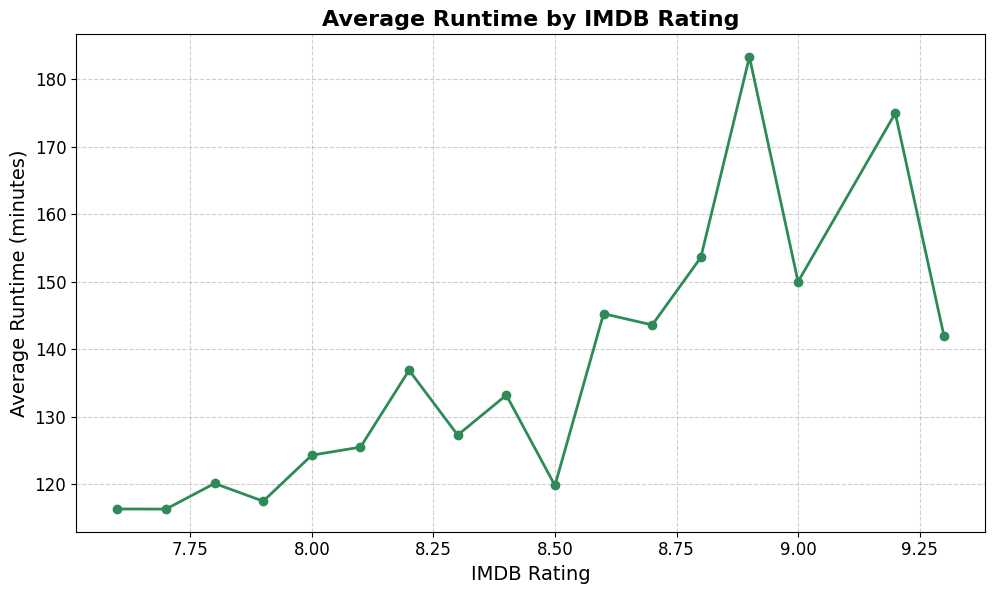

In [43]:
average_length_rating.plot(figsize=(10, 6), color="seagreen", marker="o", linewidth=2)
plt.title("Average Runtime by IMDB Rating", fontsize=16, fontweight="bold")
plt.xlabel("IMDB Rating", fontsize=14)
plt.ylabel("Average Runtime (minutes)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

/tmp/ipykernel_410847/4195126833.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_length = imdb_data.groupby(


(array([7.85, 7.9 , 7.95, 8.  , 8.05, 8.1 , 8.15, 8.2 , 8.25]),
 [Text(0, 7.8500000000000005, '7.85'),
  Text(0, 7.9, '7.90'),
  Text(0, 7.95, '7.95'),
  Text(0, 8.0, '8.00'),
  Text(0, 8.05, '8.05'),
  Text(0, 8.100000000000001, '8.10'),
  Text(0, 8.15, '8.15'),
  Text(0, 8.200000000000001, '8.20'),
  Text(0, 8.25, '8.25')])

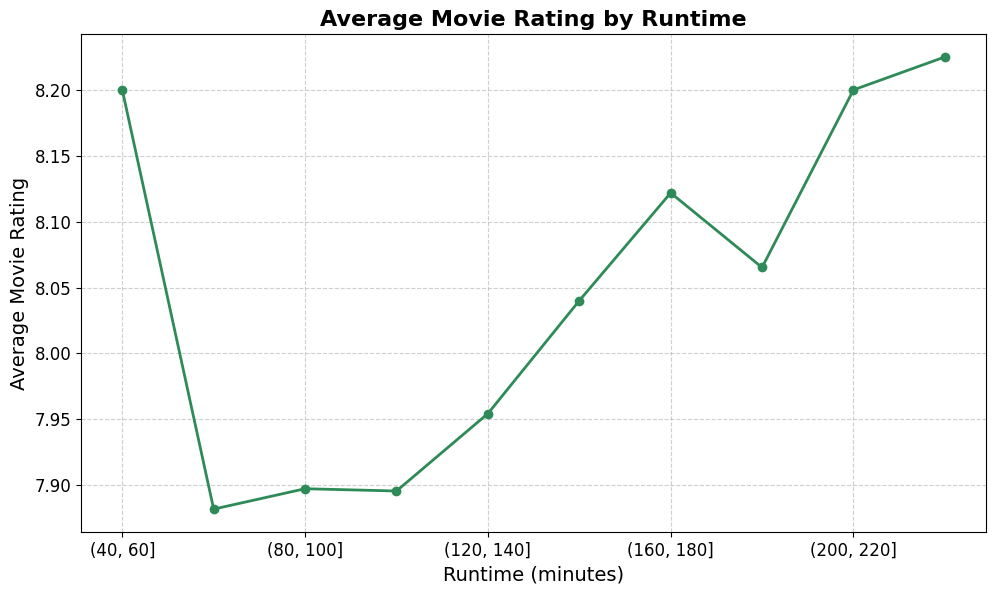

In [45]:
average_rating_length = imdb_data.groupby(
    pd.cut(imdb_data["Runtime"], np.arange(0, 250, 20))
)["IMDB_Rating"].mean()

average_rating_length.plot(figsize=(10, 6), color="seagreen", marker="o", linewidth=2)
plt.title("Average Movie Rating by Runtime", fontsize=16, fontweight="bold")
plt.xlabel("Runtime (minutes)", fontsize=14)
plt.ylabel("Average Movie Rating", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [43]:
average_length_rating = imdb_data.groupby("Runtime")["IMDB_Rating"].mean()

(array([110., 120., 130., 140., 150., 160., 170., 180., 190.]),
 [Text(0, 110.0, '110'),
  Text(0, 120.0, '120'),
  Text(0, 130.0, '130'),
  Text(0, 140.0, '140'),
  Text(0, 150.0, '150'),
  Text(0, 160.0, '160'),
  Text(0, 170.0, '170'),
  Text(0, 180.0, '180'),
  Text(0, 190.0, '190')])

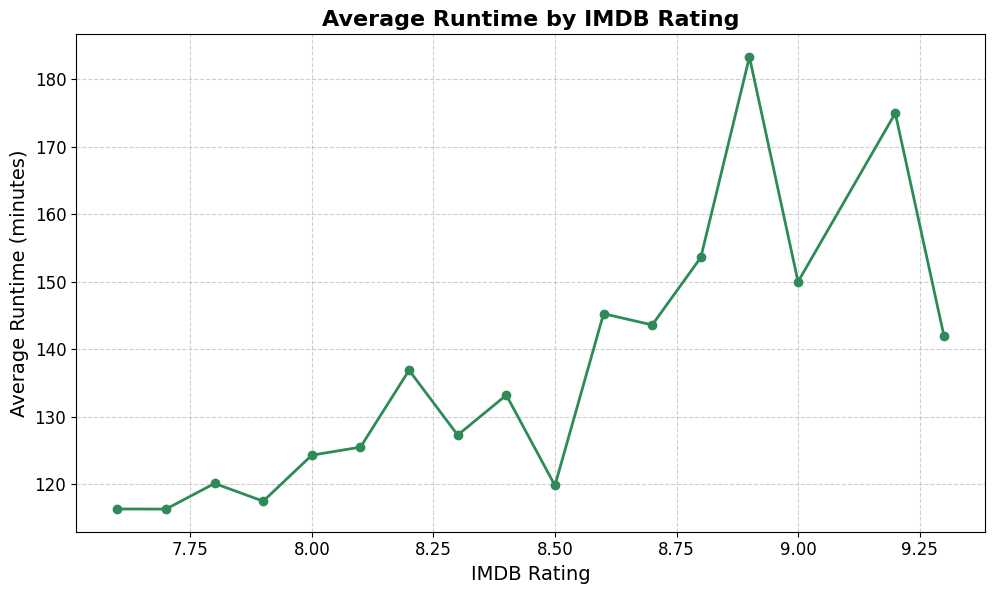

In [44]:
average_length_rating.plot(figsize=(10, 6), color="seagreen", marker="o", linewidth=2)
plt.title("Average Runtime by IMDB Rating", fontsize=16, fontweight="bold")
plt.xlabel("IMDB Rating", fontsize=14)
plt.ylabel("Average Runtime (minutes)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)